In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Q1

Data Exploration of Tandem Data

1. Read the entire dataset using pandas dataframe and build the file by appending
each file in an optimized manner

In [3]:
df1 = pd.read_csv('./tandem_data/201803-fordgobike-tripdata.csv')
df2 = pd.read_csv('./tandem_data/201807-fordgobike-tripdata.csv')
df3 = pd.read_csv('./tandem_data/201811-fordgobike-tripdata.csv')
df4 = pd.read_csv('./tandem_data/201812-fordgobike-tripdata.csv')
df = pd.concat([df1, df2, df3, df4])
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,71766,2018-03-31 16:58:33.1490,2018-04-01 12:54:39.2630,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,341,Customer,1964.0,Female,No
1,62569,2018-03-31 19:03:35.9160,2018-04-01 12:26:25.0350,78.0,Folsom St at 9th St,37.773717,-122.411647,47.0,4th St at Harrison St,37.780955,-122.399749,536,Subscriber,1984.0,Male,No
2,56221,2018-03-31 20:13:13.5640,2018-04-01 11:50:14.8400,258.0,University Ave at Oxford St,37.872355,-122.266447,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3245,Customer,1983.0,Male,No
3,85844,2018-03-31 11:28:07.6580,2018-04-01 11:18:52.6130,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,340.0,Harmon St at Adeline St,37.849735,-122.270582,3722,Customer,NaN,NaN,No
4,1566,2018-03-31 23:37:56.6400,2018-04-01 00:04:02.8930,193.0,Grand Ave at Santa Clara Ave,37.812744,-122.247215,196.0,Grand Ave at Perkins St,37.808894,-122.256460,2355,Subscriber,1979.0,Male,No


2. What was the time duration for the average trip taken? (Use plotting techniques and
write your observations for the same.)

In [4]:
mean_time = df['duration_sec'].mean()
print(f"The average trip duration is {mean_time} seconds")

The average trip duration is 834.4304272507298 seconds


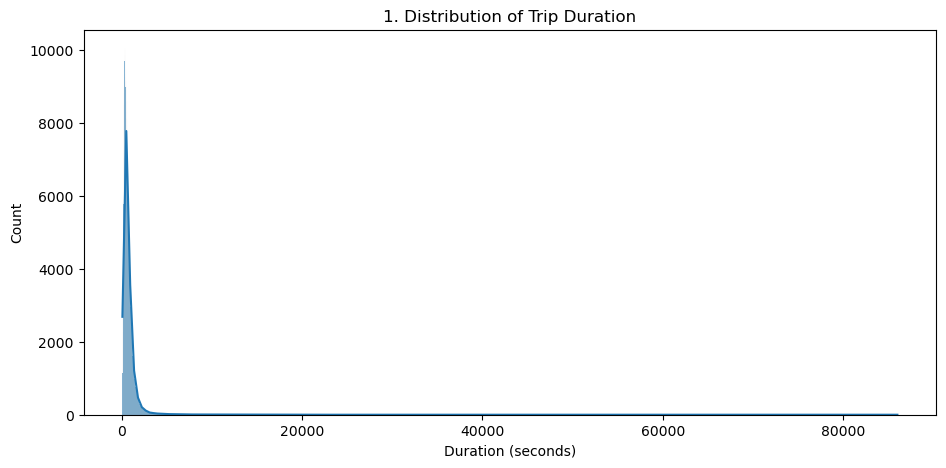

In [5]:
plt.figure(figsize=(11,5))
sns.histplot(data=df,x="duration_sec",kde=True)
plt.title("1. Distribution of Trip Duration")
plt.xlabel("Duration (seconds)")
plt.show()

From the above plot, we can observe that most of the data lies below the 4000 seconds.

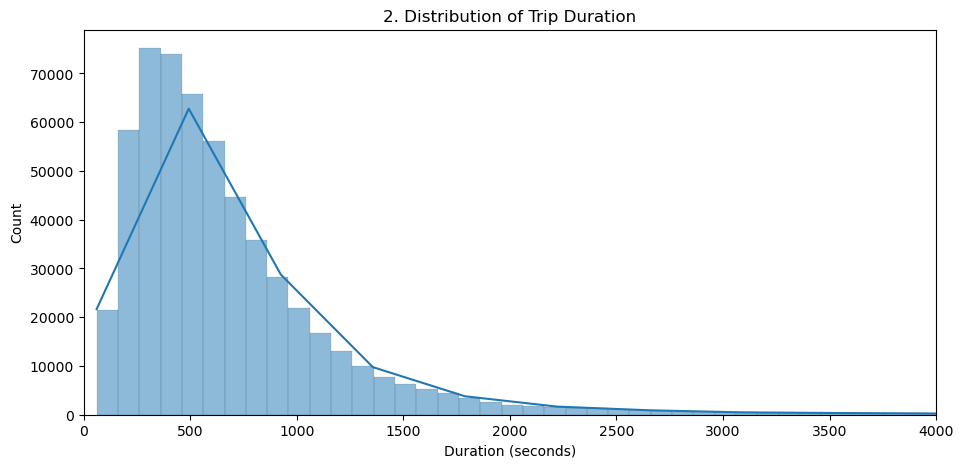

In [6]:
plt.figure(figsize=(11,5))
plt.title("2. Distribution of Trip Duration")
sns.histplot(data=df,x="duration_sec",bins=100,binwidth=100,kde=True)
plt.xlim(0, 4000)
plt.xlabel("Duration (seconds)")
plt.show()

**Obeservations regarding time duration:**
1. Time duration distribution is extemely postive or right skewed as observed in plot 1.
2. As observed in plot 2, most of the data is ditributed in range 0 to 3500 seconds.

3. Is there any correlation between the months and the trip duration? Use scatter plot
and comment your observations from the plot

In [7]:
#convert start_time and end_time to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [8]:
df["Month"] = df["start_time"].dt.month

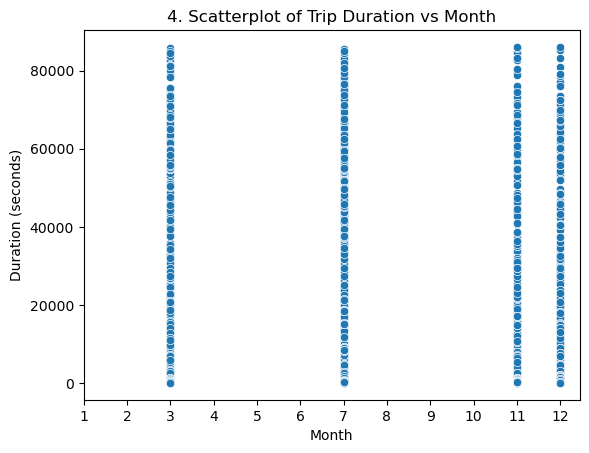

In [9]:
sns.scatterplot(data=df,x="Month",y="duration_sec")
plt.title("4. Scatterplot of Trip Duration vs Month")
plt.xlabel("Month")
plt.ylabel("Duration (seconds)")
plt.xticks(range(1,13))
plt.show()

4. Do seasons affect the duration of a trip ? Comment your observations.

In [10]:
# Creating Season Column based on Month
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

df["season"] = df["Month"].apply(get_season)

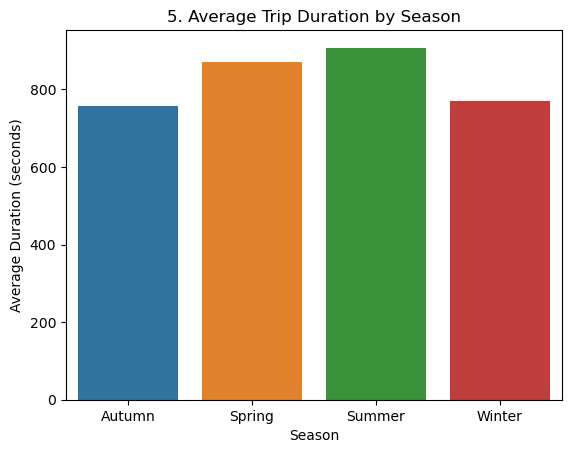

In [11]:
# Plotting Average Trip Duration by Season
sns.barplot(x="season", y="duration_sec", data=df.groupby("season")["duration_sec"].mean().reset_index())
plt.title("5. Average Trip Duration by Season")
plt.xlabel("Season")
plt.ylabel("Average Duration (seconds)")
plt.show()

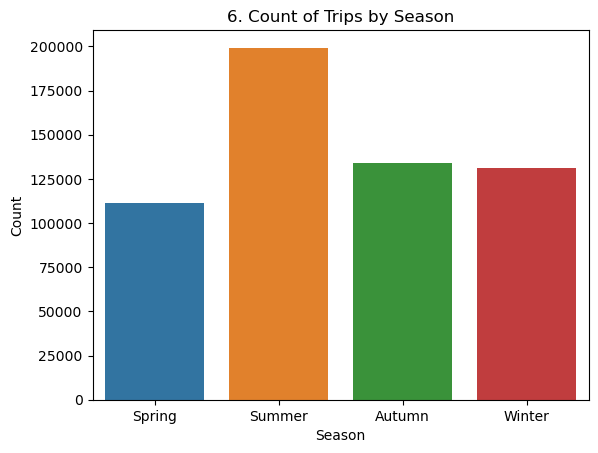

In [12]:
sns.countplot(x="season", data=df)
plt.title("6. Count of Trips by Season")
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()

5. Using multivariate exploration, explain whether there is any relation between short
trips and the users.

In [13]:
df["Trip Short/Long"] = df["duration_sec"].apply(lambda x: "Short" if x < 900 else "Long")
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Month,season,Trip Short/Long
0,71766,2018-03-31 16:58:33.149,2018-04-01 12:54:39.263,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,341,Customer,1964.0,Female,No,3,Spring,Long
1,62569,2018-03-31 19:03:35.916,2018-04-01 12:26:25.035,78.0,Folsom St at 9th St,37.773717,-122.411647,47.0,4th St at Harrison St,37.780955,-122.399749,536,Subscriber,1984.0,Male,No,3,Spring,Long
2,56221,2018-03-31 20:13:13.564,2018-04-01 11:50:14.840,258.0,University Ave at Oxford St,37.872355,-122.266447,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3245,Customer,1983.0,Male,No,3,Spring,Long
3,85844,2018-03-31 11:28:07.658,2018-04-01 11:18:52.613,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,340.0,Harmon St at Adeline St,37.849735,-122.270582,3722,Customer,NaN,NaN,No,3,Spring,Long
4,1566,2018-03-31 23:37:56.640,2018-04-01 00:04:02.893,193.0,Grand Ave at Santa Clara Ave,37.812744,-122.247215,196.0,Grand Ave at Perkins St,37.808894,-122.256460,2355,Subscriber,1979.0,Male,No,3,Spring,Long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131358,473,2018-12-01 00:11:54.811,2018-12-01 00:19:48.547,345.0,Hubbell St at 16th St,37.766474,-122.398295,81.0,Berry St at 4th St,37.775880,-122.393170,3035,Subscriber,1982.0,Female,No,12,Winter,Short
131359,841,2018-12-01 00:02:48.726,2018-12-01 00:16:49.766,10.0,Washington St at Kearny St,37.795393,-122.404770,58.0,Market St at 10th St,37.776619,-122.417385,2034,Subscriber,1999.0,Female,No,12,Winter,Short
131360,260,2018-12-01 00:05:27.615,2018-12-01 00:09:47.956,245.0,Downtown Berkeley BART,37.870139,-122.268422,255.0,Virginia St at Shattuck Ave,37.876573,-122.269528,2243,Subscriber,1991.0,Male,No,12,Winter,Short
131361,292,2018-12-01 00:03:06.549,2018-12-01 00:07:59.080,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,126.0,Esprit Park,37.761634,-122.390648,545,Subscriber,1963.0,Male,No,12,Winter,Short


In [14]:
df["member_gender"].value_counts()

member_gender
Male      402147
Female    133832
Other       8627
Name: count, dtype: int64

In [15]:
gender_trip_length = df.groupby("Trip Short/Long")["member_gender"].value_counts()
print(gender_trip_length)
gender_trip_length = df.groupby("Trip Short/Long")["member_gender"].value_counts().unstack()
print(gender_trip_length)
contingency_table = pd.concat([gender_trip_length.loc["Long"], gender_trip_length.loc["Short"]], axis=1)
contingency_table.drop("Other", axis=0, inplace=True)
contingency_table

Trip Short/Long  member_gender
Long             Male              77798
                 Female            36948
                 Other              2081
Short            Male             324349
                 Female            96884
                 Other              6546
Name: count, dtype: int64
member_gender    Female    Male  Other
Trip Short/Long                       
Long              36948   77798   2081
Short             96884  324349   6546


,Long,Short
member_gender,,
Female,36948,96884
Male,77798,324349


In [16]:
import scipy.stats as stats
# Perform the chi-square test
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)
if p_val < 0.05:
    print("Reject the null hypothesis")
    print("There is a relation between gender and trip length")
else:
    print("Fail to reject the null hypothesis")
    print("There is no relation between gender and trip length")

Reject the null hypothesis
There is a relation between gender and trip length


In [17]:
gender_trip_length = df.groupby("Trip Short/Long")["user_type"].value_counts()
print(gender_trip_length)
gender_trip_length = df.groupby("Trip Short/Long")["user_type"].value_counts().unstack()
print(gender_trip_length)
contingency_table = pd.concat([gender_trip_length.loc["Long"], gender_trip_length.loc["Short"]], axis=1)
contingency_table

Trip Short/Long  user_type 
Long             Subscriber     88525
                 Customer       43849
Short            Subscriber    404972
                 Customer       38756
Name: count, dtype: int64
user_type        Customer  Subscriber
Trip Short/Long                      
Long                43849       88525
Short               38756      404972


,Long,Short
user_type,,
Customer,43849,38756
Subscriber,88525,404972


In [18]:
import scipy.stats as stats
# Perform the chi-square test
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)
if p_val < 0.05:
    print("Reject the null hypothesis")
    print("There is a relation between user type and trip length")
else:
    print("Fail to reject the null hypothesis")
    print("There is no relation between user type and trip length")

Reject the null hypothesis
There is a relation between user type and trip length


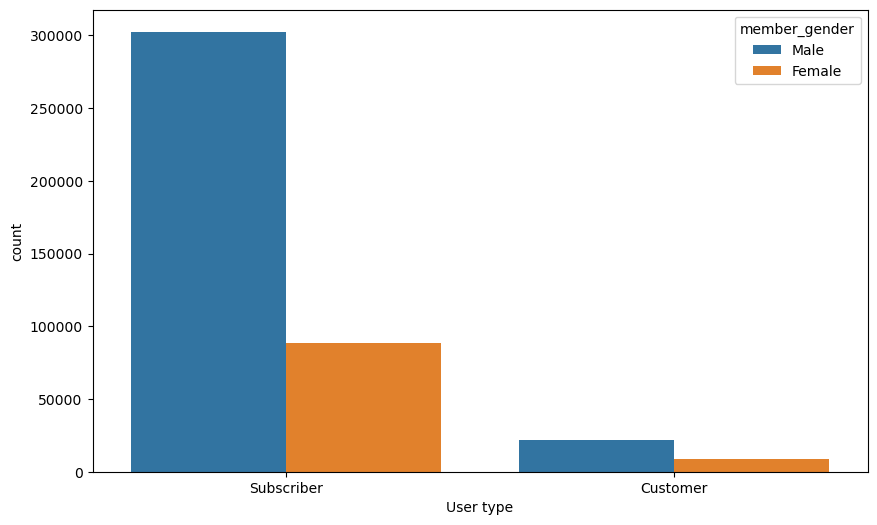

In [19]:
df_temp = df[(df["Trip Short/Long"]=="Short")&(df["member_gender"]!="Other")]
plt.figure(figsize=(10,6))
sns.countplot(x='user_type', hue='member_gender', data=df_temp)
plt.xlabel("User type")
plt.show()

### Q2 

1. Create a Matrix between 0 and 1, with each value difference of 0.01.

In [20]:
a = np.arange(0, 1, 0.01)
a

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

2. Create an array of 20 linearly spaced points between 0 and 1.

In [21]:
a = np.linspace(0, 1, 20)
a

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

3. Create a 5*5 matrix using range 1 to 26, and return sum of the matrix, standard
deviation and sum of all the columns of the matrix.

In [22]:
a = np.arange(1, 26).reshape(5, 5)
print(a)
print(a.sum())
print(a.std())
print(a.sum(axis=1))

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]
325
7.211102550927978
[ 15  40  65  90 115]


### Q3

In [23]:
import numpy as np
x = np.arange(0,100)
y = x*2
z = x**2

1. Create a figure object and axis of the figure canvas at axis1 = [0,0,1,1]. Provide
necessary labels and title to the plot.

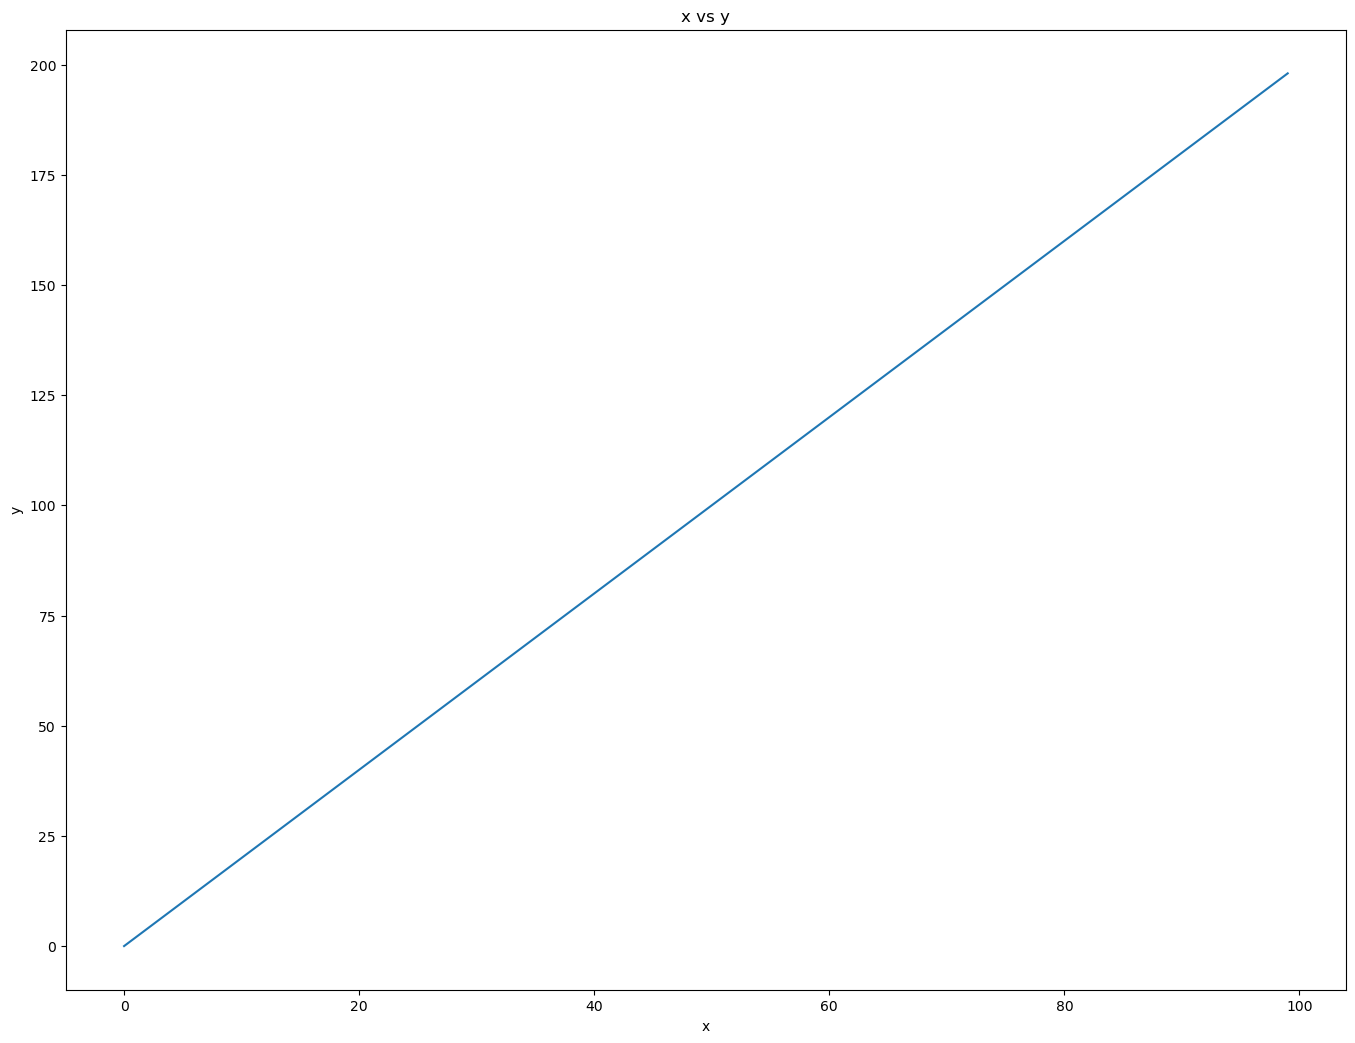

In [24]:
fig = plt.figure()
# The list is left, bottom, width, height. All quantities are in fractions of figure width and height.
ax = fig.add_axes([0,0,2,2])
plt.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('x vs y')
plt.show()

2. Create another plot at axis1 = [0,0,1,1] and axis2 = [0.2,0.5,0.2,0.2]

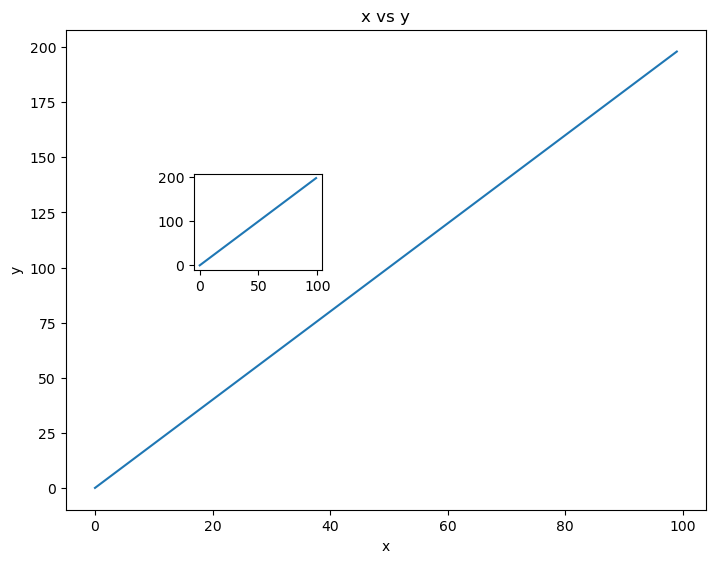

In [25]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0.2,0.5,0.2,0.2])
ax1.plot(x, y)
ax2.plot(x, y)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('x vs y')
plt.show()

3. Create a plot by adding two axis object at [0,0,1,1] & [0.2,0.5,0.4,0.4]

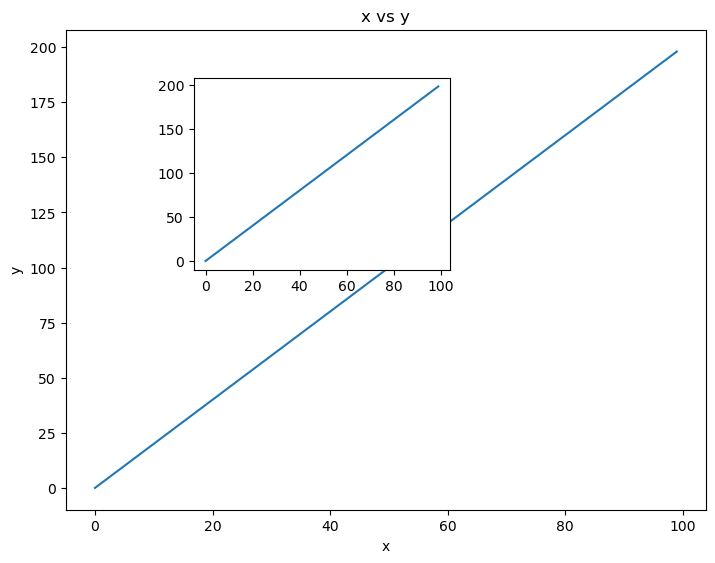

In [26]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0.2,0.5,0.4,0.4])
ax1.plot(x, y)
ax2.plot(x, y)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('x vs y')
plt.show()

4. Use x, y, z array to create the plots<br>
i. Between x and z arrays

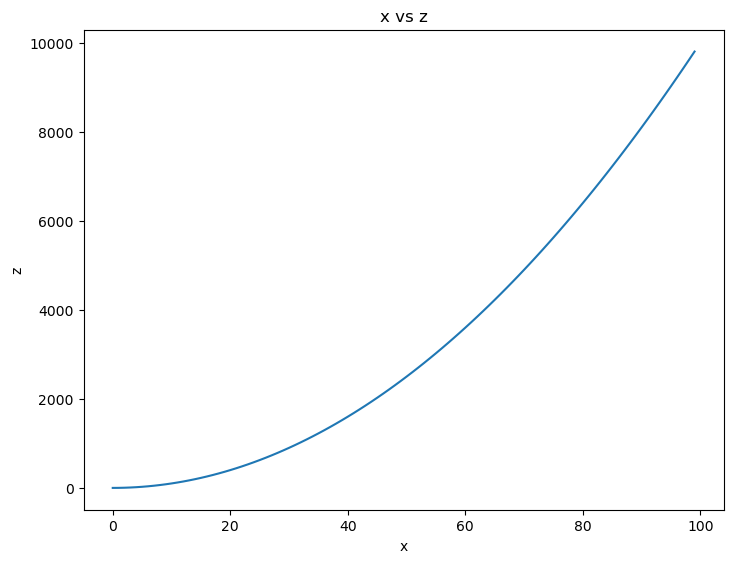

In [27]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])
ax1.plot(x, z)
ax1.set_xlabel('x')
ax1.set_ylabel('z')
ax1.set_title('x vs z')
plt.show()

ii. Between x & y arrays by setting the x-limit in range 20-22 and y-limit range in
30-50

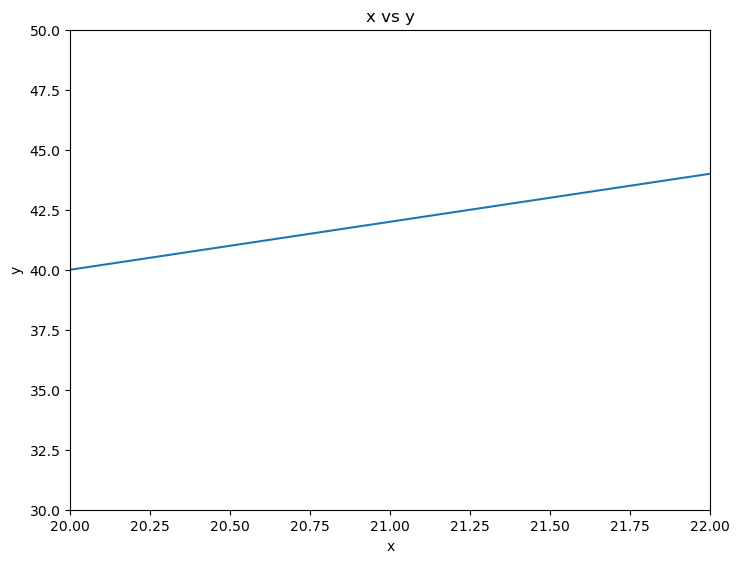

In [28]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])
ax1.plot(x, y)
ax1.set_xlim((20, 22))
ax1.set_ylim((30, 50))
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('x vs y')
plt.show()

### Q4
Walmart Purachase Analysis

In [29]:
df = pd.read_csv('./walmart_purchase_data.csv')
df.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           10000 non-null  object 
 1   Lot               10000 non-null  object 
 2   AM or PM          10000 non-null  object 
 3   Browser Info      10000 non-null  object 
 4   Company           10000 non-null  object 
 5   Credit Card       10000 non-null  int64  
 6   CC Exp Date       10000 non-null  object 
 7   CC Security Code  10000 non-null  int64  
 8   CC Provider       10000 non-null  object 
 9   Email             10000 non-null  object 
 10  Job               10000 non-null  object 
 11  IP Address        10000 non-null  object 
 12  Language          10000 non-null  object 
 13  Purchase Price    10000 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


In [31]:
df.isnull().sum()

Address             0
Lot                 0
AM or PM            0
Browser Info        0
Company             0
Credit Card         0
CC Exp Date         0
CC Security Code    0
CC Provider         0
Email               0
Job                 0
IP Address          0
Language            0
Purchase Price      0
dtype: int64

What is the average Purchase Price?

In [32]:
df['Purchase Price'].mean()

50.347302

What were the highest and lowest purchase prices?

In [33]:
print("Maximum Purchase price is :", df['Purchase Price'].max())
print("Minimum Purchase price is :", df['Purchase Price'].min())

Maximum Purchase price is : 99.99
Minimum Purchase price is : 0.0


How many people have English 'en' as their Language of choice on the website?

In [34]:
df[df['Language'] == 'en'].shape[0]

1098

What is the email of the person with the following Credit Card Number:
4926535242672853

In [35]:
credit_no = 4926535242672853
df[df['Credit Card'] == credit_no]['Email'].values[0]

'bondellen@williams-garza.com'

Someone made a purchase that came from Lot: "90 WT" , what was the Purchase
Price for this transaction?

In [36]:
df[df['Lot'] == '90 WT']['Purchase Price'].values[0]

75.1

How many people have American Express as their Credit Card Provider and made
a purchase above $95 ?

In [37]:
df[(df['CC Provider'] == 'American Express') & (df['Purchase Price'] > 95)].shape[0]

39

How many people have a credit card that expires in 2025?

In [38]:
# df[df['CC Exp Date'].str.contains('/25')].shape[0]

df['CC Exp Date'] = pd.to_datetime(df['CC Exp Date'], format='%m/%y')
df[df['CC Exp Date'].dt.year == 2025].shape[0]

1033

What are the top 5 most popular email providers/hosts (e.g. gmail.com, yahoo.com,
etc...) ?

In [39]:
df['email_provider'] = df['Email'].str.extract(pat='(@.*)')
df['email_provider'].value_counts().head()

email_provider
@hotmail.com     1638
@yahoo.com       1616
@gmail.com       1605
@smith.com         42
@williams.com      37
Name: count, dtype: int64

What are the 5 most common Job Titles?

In [40]:
df['Job'].value_counts().head()

Job
Interior and spatial designer    31
Lawyer                           30
Social researcher                28
Purchasing manager               27
Designer, jewellery              27
Name: count, dtype: int64

How many people made the purchase during morning and evening time?

In [41]:
print("Purchase made in morning:", df[df['AM or PM'] == 'AM'].shape[0])
print("Purchase made in evening:", df[df['AM or PM'] == 'PM'].shape[0])

Purchase made in morning: 4932
Purchase made in evening: 5068
